# Implementation of Perceptron Classifier


## We will use the IRIS datset and pose it as a Binary classification problem.


# Import the libraries

In [29]:

import numpy as np

from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Load Data

In [30]:
 iris = datasets.load_iris()
 # iris.data
# iris.target


In [31]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [168]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# selected_features = [0, 1]
# selected_features = [2, 3]
selected_features = [0, 1, 2, 3]

# Which class to select?
# Setosa and Versicolor
# idx1 = 0
# idx2 = 100

idx1 = 50
idx2 = 150


# Collect the data
X = iris.data[idx1:idx2, selected_features]
# y = iris.target[idx1:idx2]
y = iris.target[idx1:idx2] - 1


print('\n Data Features : {}'.format(X.shape))
print('\n Distinct Class Labels : ', np.unique(y))




 Data Features : (100, 4)

 Distinct Class Labels :  [0 1]


# Split Data into Train and Test Set

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True, stratify=y)


In [170]:
X_train.shape

(70, 4)

In [171]:
X_test.shape

(30, 4)

In [172]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [173]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1])

In [174]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

# Standardize Data

In [175]:
sc = StandardScaler()

# Fit the object with training data
sc.fit(X_train)

# Transform the training data
X_train_std = sc.transform(X_train)

#X_train_std = sc.fit_transform(X_train)

# Just transform the test data with the already fitted object of StandardScaler class
X_test_std = sc.transform(X_test)



# Implementation of Perceptron Algorithm


In [176]:
# Define a Class

class Perceptron:

  # Activation function
  def activate(self, row):
    activation = self.weights[0] # Bias term
    for i in range(len(row)):
      activation += self.weights[i+1] * row[i]

    # Threshold the output
    return 1.0 if activation >= 0.0 else 0.0


  # Function for Training the Perceptron
  def train(self, train_data, labels, l_rate, n_epoch):
    # Initialization
    self.weights = [0.0 for i in range(len(train_data[0])+1)]

    # Training iterations
    for epoch in range(n_epoch):
      for sample, lab in zip(train_data, labels):
        # Computer the activation of the neuron
        prediction = self.activate(sample)
        # Compute error
        error = lab - prediction

        # Update the weights and bias terms
        self.weights[0] = self.weights[0] + l_rate * error
        for i in range(len(sample)):
          self.weights[i+1] = self.weights[i+1] + l_rate *error*sample[i]

    #return self.weights

  # Make Prediction with Perceptron
  def predict (self, test_data):
      predictions = list()
      for sample in test_data:
        prediction = self.activate(sample)
        predictions.append(prediction)
      return predictions

     # Calculate Accuracy of the model
  def accuracy_metric(self, actual, predicted):
      correct = 0
      for i in range(len(actual)):
        if actual[i] == predicted[i]:
          correct +=1
      return correct/float(len(actual)) * 100



# Apply Perceptron on the IRIS Data

# Set the parameters

In [177]:
# Learning rate
l_rate = 0.01

# Number of epochs
n_epoch = 300


# Create the Perceptron

In [178]:
ppn = Perceptron()

# Train the Perceptron

In [179]:
ppn.train(X_train_std, y_train, l_rate, n_epoch)

# Check the Trained Weights

In [180]:
print(ppn.weights)

[-0.019999999999999997, -0.034814982818214144, -0.01759793764255661, 0.10646780676676074, 0.1201112879765726]


# Make Prediction

In [181]:
pred = ppn.predict(X_test_std)
pred

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [182]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [183]:
acc = ppn.accuracy_metric(y_test, pred)
acc

93.33333333333333

In [184]:
accuracy_score(y_test, pred)

0.9333333333333333

In [185]:
confusion_matrix(y_test, pred)

array([[15,  0],
       [ 2, 13]])

In [186]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# Save the Results for Later Use

In [187]:

import pandas as pd

report = classification_report(y_test, pred, target_names=['Versicolor', 'Verginica'], output_dict=True)

df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
Versicolor,0.882353,1.000000,0.937500,15.000000
Verginica,1.000000,0.866667,0.928571,15.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.941176,0.933333,0.933036,30.000000
weighted avg,0.941176,0.933333,0.933036,30.000000


# Save as a CSV file

In [188]:
df.to_csv('Results.csv')

In [189]:
# Custom Function for Visulaization

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    X = np.array(X)
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.array(Z)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')



<ipython-input-189-3b7b9798f99f>:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


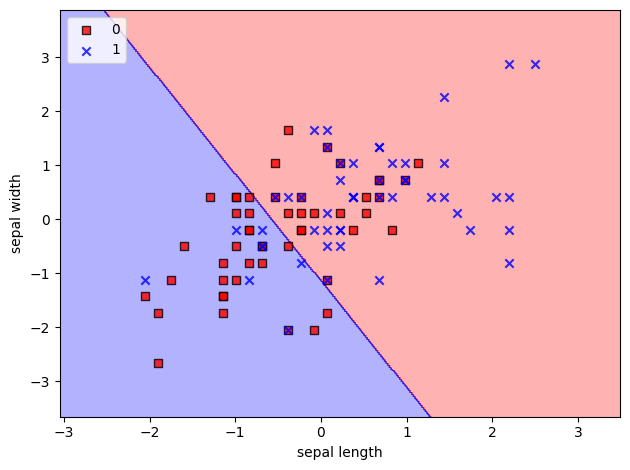

In [190]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel(features[selected_features[0]])
plt.ylabel(features[selected_features[1]])
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/perceptron.png', dpi=300)
plt.show()


# Scikit-Learn Perceptron

In [191]:
from sklearn.linear_model import Perceptron

In [192]:
pt = Perceptron(eta0=0.01, random_state=1)


In [193]:
pt.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

In [194]:
pt.intercept_

array([0.01])

In [195]:
pt.coef_

array([[-0.00987291, -0.00197977,  0.05579205,  0.0506365 ]])

In [196]:
y_pred = pt.predict(X_test_std)

In [197]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [198]:
confusion_matrix(y_test, y_pred)

array([[15,  0],
       [ 2, 13]])

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

